In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession

import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql.functions import col, desc

#Let’s create sparkSession now to access functionalities of Spark

spark = SparkSession.builder \
.master("spark://10.130.10.80:7077") \
.appName("Project_main") \
.getOrCreate()

In [2]:
pwd

'/mnt/project-cluster-group22-pvc'

In [3]:
graph_df = pd.DataFrame(columns=['Day', "Personal vehicles", "Trucks", "Buses" ])

In [4]:
#Patches data
for day_number in range(75, 121):
    df = spark.read.csv("/mnt/project-cluster-group22-pvc/lam_data_uusimaa_18/LAM_data_day{}.csv".format(day_number), header=True, inferSchema=True, sep=";")
    
    data_counts = df.groupBy('category').count().sort(('category'), ascending=True).alias("category")
    
    data_counts_test = data_counts.toPandas()
    
    cars = data_counts_test['count'].values[1]
    
    trucks = (data_counts_test['count'].values[2] + 
              data_counts_test['count'].values[4] + 
              data_counts_test['count'].values[5] +
              data_counts_test['count'].values[6] )
    
    buses = data_counts_test['count'].values[3]
    
    graph_df20.loc[day_number] = [day_number] + [cars] + [trucks] + [buses]


In [5]:
print(graph_df.head())

   Day Personal vehicles  Trucks  Buses
75  75           3378250  256572  25912
76  76           2389969   78470  16924
77  77           2297439   68713  14862
78  78           3130713  273214  23826
79  79           3126336  270607  23864


Text(0.5, 0, 'Day')

Text(0, 0.5, 'Vehicles on a road')

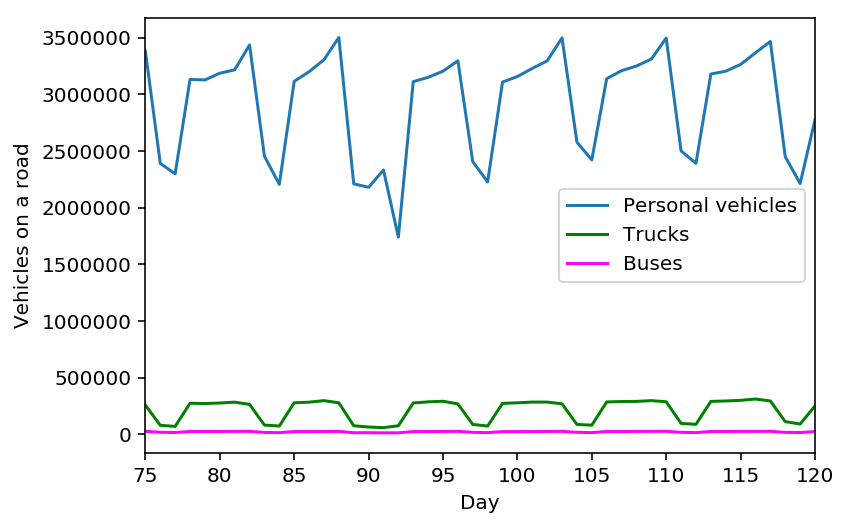

In [10]:
import matplotlib.pyplot as plt


ax = plt.gca()
ax.locator_params(integer=True)
ax.set_xlabel("Day")
ax.set_ylabel("Vehicles on a road")

graph_df.plot(kind='line',x='Day',y='Personal vehicles', ax=ax)
graph_df.plot(kind='line',x='Day',y='Trucks', color='green', ax=ax)
graph_df.plot(kind='line',x='Day',y='Buses', color='magenta', ax=ax )

plt.show()

In [7]:
pwd

'/mnt/project-cluster-group22-pvc'

In [19]:
fig = ax.get_figure()
fig.savefig('/mnt/project-cluster-group22-pvc/graph_uusimaa_eri_ajoneuvot3.jpg', dpi=300)

In [8]:
graph_df.head()

,Day,Personal vehicles,Trucks,Buses
75,75,3378250,256572,25912
76,76,2389969,78470,16924
77,77,2297439,68713,14862
78,78,3130713,273214,23826
79,79,3126336,270607,23864


In [9]:
#Safes dataframe that we don't need to calculated every time
graph_df.to_csv("Graph dataframe.csv", index=False, header=True)